# ProfAIling project

## Our task

In [2]:
# Required libraries.
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import spacy
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
from spacy import tokenizer
from spacy.lang.en import English
nlp = English()
tkz = tokenizer.Tokenizer(nlp.vocab)
from tqdm import tqdm
from nltk.tokenize import sent_tokenize
import seaborn as sns

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['font.family'] = 'Serif'

In [45]:
# Import data.
train = pd.read_json('train.json')

# Let's have a look at out data.
print(train.head())
print('')
print(train.shape)

                                                post  age  gender
0                          ooh shiny new commenting!   16  female
1  so wuts up? today i had the parade. suked. but...   14    male
2  i don't know about anyone else anymore, but i'...   24  female
3  urlLink    another roof-top sunset  Posted by ...   24    male
4  gawd i luv my nanny!  she's absolutely the gre...   23  female

(526812, 3)


# Exploratory Data Analysis

## 1. Counts and lengths

In [4]:
train.loc[3].post

'urlLink    another roof-top sunset  Posted by Paul'

### Character Count

In [47]:
# New column for the length of the posts.
train['length'] = train['post'].apply(len)

In [9]:
# I'M DELETING PART OF THE DATA, NEED TO BE DISCUSS
train = train.loc[train["length"]<20000]

<Axes: >

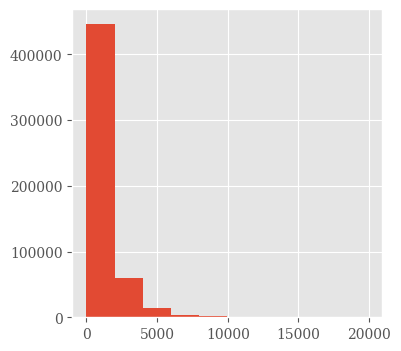

In [11]:
train.length.hist()
#Need to eliminate post with this length

In [48]:
# Checking missin values.
train.isna().sum()

post      0
age       0
gender    0
length    0
dtype: int64

Text(0.5, 1.0, 'Age distribution')

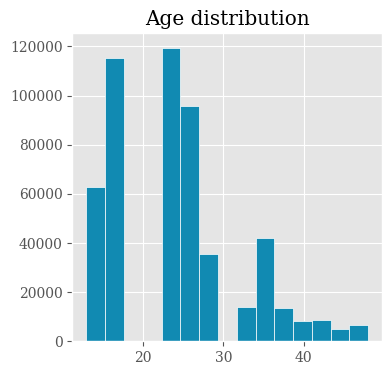

In [49]:
# Target class distribution.
train.age.hist(bins = 15,  color = "#118ab2", ec="white", label = "Age distribution")
plt.title("Age distribution")

In [50]:
# Double Check
train['age_class'] = pd.cut(
        train["age"],
        bins=[12, 18, 28, 50],
        labels=[0, 1, 2]
    ).astype("int")

In [51]:
print(len(train[train.age <= 17]))                        # Class 1
print(len(train[(train.age >= 23) & (train.age <= 27)]))  # Class 2
print(len(train[(train.age >= 28) & (train.age <= 48)]))  # Class 3

#same check
train["age_class"].value_counts()

177940
250672
98200


1    250672
0    177940
2     98200
Name: age_class, dtype: int64

In [52]:
train.head(6)

,post,age,gender,length,age_class
0,ooh shiny new commenting!,16,female,25,0
1,so wuts up? today i had the parade. suked. but...,14,male,245,0
2,"i don't know about anyone else anymore, but i'...",24,female,462,1
3,urlLink another roof-top sunset Posted by ...,24,male,50,1
4,gawd i luv my nanny! she's absolutely the gre...,23,female,3656,1
5,"7._ Km, 39:19.4, Partly cloudy -4C, 6 km wind ...",41,male,136,2


### Word Count

In [53]:
# Adding a new colums with the number of word for the number of words in every post.
# Different from Lenght because is not the numbers of characters.
train['word_count'] = train['post'].apply(lambda x: len(str(x).split()))
print(train[train['age_class']==0]['word_count'].mean()) # 12 - 17 tweets
print(train[train['age_class']==1]['word_count'].mean()) # 18 - 29 tweets
print(train[train['age_class']==2]['word_count'].mean()) # 29 - 50 tweets

190.02078228616386
205.92256015829452
215.80631364562117


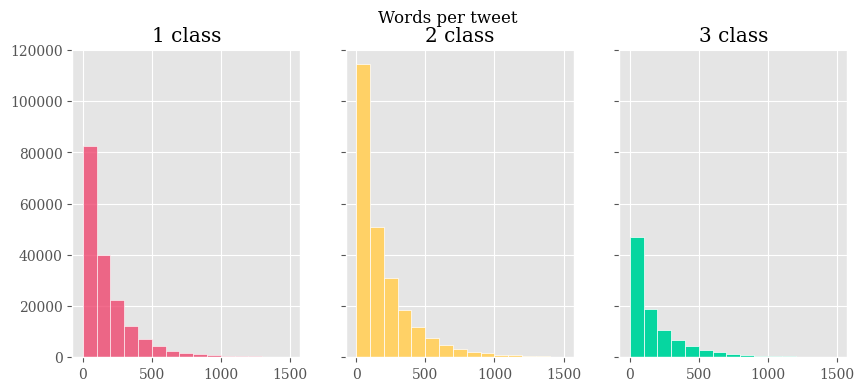

In [54]:
# This histograms are only up to 1500 words because few tweets have more than this number but there are some tweet with a loooots of words.
train[train.age_class==0]['word_count'].max() #115370 
train[train.age_class==1]['word_count'].max() #69208
train[train.age_class==2]['word_count'].max() #131169
#weeeel very big, maybe they are outliers...

fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(10,4), sharey= True)
#train_words=train[train['age_class']==0]['word_count']
ax1.hist(train[train.age_class==0][train.word_count < 1500]['word_count'], color="#ef476f", ec = "white", bins = 15, alpha = 0.8)
ax1.set_title('1 class')
ax2.hist(train[train.age_class==1][train.word_count < 1500]['word_count'], color="#ffd166", ec = "white", bins = 15)
ax2.set_title('2 class')
ax3.hist(train[train.age_class==2][train.word_count < 1500]['word_count'], color="#06d6a0", ec = "white", bins = 15)
ax3.set_title('3 class')

fig.suptitle('Words per tweet')
plt.show()



### Sentence Count

In [56]:
# Sentence counts
train["sent_count"] = train["post"].map(lambda x: len(sent_tokenize(x)))
# Average word length
train["avg_word_len"] = train["post"].map(lambda x: np.mean([len(w) for w in str(x).split()]))
# Average sentence length
train["avg_sent_len"] = train["post"].map(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))

#take ages to run (8 minutes ahahah)

In [57]:
train

,post,age,gender,length,age_class,word_count,sent_count,avg_word_len,avg_sent_len
0,ooh shiny new commenting!,16,female,25,0,4,1,5.500000,4.000000
1,so wuts up? today i had the parade. suked. but...,14,male,245,0,48,13,4.062500,3.692308
2,"i don't know about anyone else anymore, but i'...",24,female,462,1,80,4,4.750000,20.000000
3,urlLink another roof-top sunset Posted by ...,24,male,50,1,7,1,5.714286,7.000000
4,gawd i luv my nanny! she's absolutely the gre...,23,female,3656,1,730,28,3.954795,26.071429
...,...,...,...,...,...,...,...,...,...
526807,"""Write injuries in sand, kindnesses in marble....",34,male,103,2,16,2,5.312500,8.000000
526808,urlLink Wes and his Dad Stan urlLink,24,female,40,1,7,1,4.285714,7.000000
526809,I also prefer calling you a nice guy. In fact...,13,male,763,0,152,11,3.967105,13.818182
526810,Angela and I went to see Othello last night. I...,17,female,414,0,77,11,4.363636,7.000000


In [58]:
train_small = train.loc[train["length"]<3000]

In [59]:
train_small

,post,age,gender,length,age_class,word_count,sent_count,avg_word_len,avg_sent_len
0,ooh shiny new commenting!,16,female,25,0,4,1,5.500000,4.000000
1,so wuts up? today i had the parade. suked. but...,14,male,245,0,48,13,4.062500,3.692308
2,"i don't know about anyone else anymore, but i'...",24,female,462,1,80,4,4.750000,20.000000
3,urlLink another roof-top sunset Posted by ...,24,male,50,1,7,1,5.714286,7.000000
5,"7._ Km, 39:19.4, Partly cloudy -4C, 6 km wind ...",41,male,136,2,27,3,4.000000,9.000000
...,...,...,...,...,...,...,...,...,...
526807,"""Write injuries in sand, kindnesses in marble....",34,male,103,2,16,2,5.312500,8.000000
526808,urlLink Wes and his Dad Stan urlLink,24,female,40,1,7,1,4.285714,7.000000
526809,I also prefer calling you a nice guy. In fact...,13,male,763,0,152,11,3.967105,13.818182
526810,Angela and I went to see Othello last night. I...,17,female,414,0,77,11,4.363636,7.000000


In [64]:
our_col = ['#ef476f', '#ffd166', '#06d6a0', '#118ab2', '#073b4c']

<Axes: xlabel='avg_sent_len', ylabel='Density'>

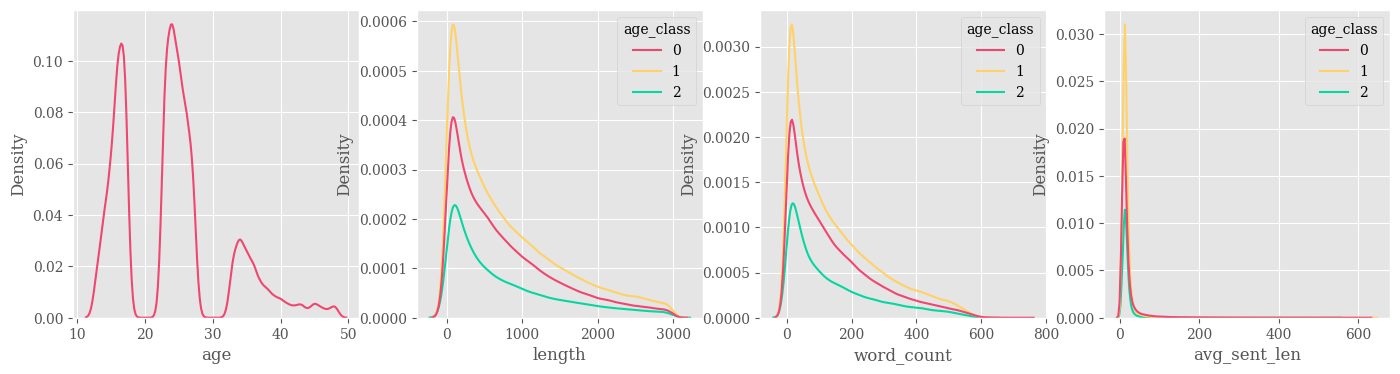

In [67]:
# KDE plot
# (Kernel density estimate)
# KDE represents the data using a continuous probability density curve in one or more dimensions.

#could be cool but we need to remove outliers... 
#sns.kdeplot(data = train, x = "length", hue = "age_class")
fig, axes = plt.subplots(figsize=(17,4), ncols=4, nrows=1)
sns.kdeplot(data = train_small, x = "age", ax = axes[0], label = "Age", color = our_col[0])
sns.kdeplot(data = train_small, x = "length", ax = axes[1], label = "Length", hue="age_class", palette = our_col)
sns.kdeplot(data = train_small, x = "word_count", ax = axes[2], label = "Word Count", hue="age_class", palette = our_col)
sns.kdeplot(data = train_small, x = "avg_sent_len", ax = axes[3], label = "Average sentence length", hue="age_class", palette = our_col)

In [69]:
# Boxplots for the variables or violinplots

#Ora non c'ho voglia


## Preprocessing

In [26]:
# Prima opzione: 179 parole vietate
import nltk
from nltk.corpus import stopwords

sw_nltk = stopwords.words('english')
sw_nltk


# Seconda opzione: 326
import spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
sw_spacy

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [27]:
# Delete stop words
def delete_stopwords(text):
    words = [word for word in text.split() if word.lower() not in sw_spacy]
    new_text = " ".join(words)
    return new_text

# Create new columns with new text and new length
train['new_post'] = train['post'].apply(delete_stopwords)
train['new_length'] = train['new_post'].apply(len)

In [141]:
from spacy import tokenizer
from spacy.lang.en import English
nlp = English()
tkz = tokenizer.Tokenizer(nlp.vocab)

In [147]:
# Tokenization
def word_tokenization(text):
    return [word.text for word in tkz(text)]

# Create new column with tokenized text
train['token_post'] = train['new_post'].apply(word_tokenization)

In [148]:
train.head()

,post,age,gender,length,age_class,new_post,new_length,token_post
0,ooh shiny new commenting!,16,female,25,0,ooh shiny new commenting!,25,"[ooh, shiny, new, commenting!]"
1,so wuts up? today i had the parade. suked. but...,14,male,245,0,wuts up? today parade. suked. wasnt bad. im ba...,163,"[wuts, up?, today, parade., suked., wasnt, bad..."
2,"i don't know about anyone else anymore, but i'...",24,female,462,1,"don't know anymore, i'm concerned everyday. wa...",305,"[don't, know, anymore,, i'm, concerned, everyd..."
3,urlLink another roof-top sunset Posted by ...,24,male,50,1,urlLink roof-top sunset Posted Paul,35,"[urlLink, roof-top, sunset, Posted, Paul]"
4,gawd i luv my nanny! she's absolutely the gre...,23,female,3656,1,gawd luv nanny! she's absolutely greatest woma...,2009,"[gawd, luv, nanny!, she's, absolutely, greates..."


In [150]:
# Stemmer
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def word_stemmer(text):
    return stemmer.stem(text)
    
train['stemming_post'] = train['new_post'].apply(word_stemmer)    

# TEST

In [42]:
# Import data
test = pd.read_json('test.json')

# Let's have a look at out data
print(test.head())
print('')
print(test.shape)

                                                post  age  gender
0  Thabo admits defeat on quiet diplomacy  Mbeki ...   27    male
1  Brainbench welcomes its 5 millionth subscriber...   25    male
2  Even though the air in Jerusalem is dry, it is...   23  female
3  there's nothing else more embarassing in life ...   25  female
4  Today I had a glass artist over for a firing. ...   38  female

(131703, 3)


In [43]:
test.age.value_counts()

24    15402
17    15300
23    14205
16    13523
25    13196
26    10931
27     8840
15     7878
14     5199
34     4233
35     3510
33     3473
36     2887
13     2511
37     1871
38     1519
39     1074
40     1024
45      910
43      852
41      733
48      721
42      576
46      517
47      447
44      371
Name: age, dtype: int64